In [1]:
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import metrics
import os

import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, BatchNormalization, Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
def construct_model():

    model_input = Input(shape=(256, 256, 3))
    x = Conv2D(16, kernel_size=3, activation='relu')(model_input)
    x = BatchNormalization()(x)

    x = Conv2D(32, kernel_size=3, activation='relu', strides=2)(x)
    x = BatchNormalization()(x)

    x = Conv2D(64, kernel_size=3, activation='relu', strides=2)(x)
    x = BatchNormalization()(x)

    x = Conv2D(64, kernel_size=3, activation='relu', strides=2)(x)
    x = BatchNormalization()(x)
    x = GlobalAveragePooling2D()(x)

    model_output = Dense(1, activation='sigmoid')(x)

    return Model(inputs=[model_input], outputs=[model_output])

model = construct_model()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 64)       

In [10]:
model.load_weights('concrete_0.2.h5')
x_test = np.load('small_x_data.npy')
y_test = np.load('small_y_data.npy')

accuracy:  0.854
f1_score:  0.18888888888888888
precision:  0.10759493670886076
recall:  0.7727272727272727


Text(0.5, 1.0, 'CNN PR Curve')

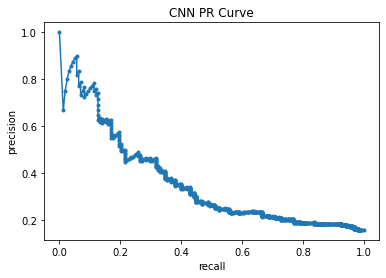

In [11]:
y_pred = model.predict(x_test)
y_pred_thresh = y_pred > 0.5

print("accuracy: ", accuracy_score(y_pred_thresh, y_test))
print("f1_score: ", f1_score(y_pred_thresh, y_test))
print("precision: ", precision_score(y_pred_thresh, y_test))
print("recall: ", recall_score(y_pred_thresh, y_test))

pr, re, _ = precision_recall_curve(y_test, y_pred)

# plot the precision-recall curves
plt.plot(re, pr, marker='.', label='CNN')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('CNN PR Curve')